In [1]:
#pip install quandl



In [2]:
# Dependencies
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from config import api_key

import pymysql
pymysql.install_as_MySQLdb()
from sqlalchemy import create_engine


# PRIME RATE
The prime rate is a guiding interest rate that lenders reference when they set interest rates for consumers on things like credit cards, loans or mortgages. The current prime rate is 3.25%.

Average Reported Prime Rate,Weighted by the Amount Loans Priced Relative to Prime, by Base Pricing Rate

In [3]:
prime_rate=pd.read_csv("../Stock-market/static/data/MPRIME.csv")
prime_rate.tail()

,Date,MPRIME
860,2020-09-01,3.25
861,2020-10-01,3.25
862,2020-11-01,3.25
863,2020-12-01,3.25
864,2021-01-01,3.25


In [4]:
# prime_rate = quandl.get("FRED/EWNQ", authtoken = api_key)
# prime_rate.tail()

In [5]:
# prime_rate_df=prime_rate.reset_index()
# prime_rate_df.tail()

In [6]:
# change datatype of date column to datetime
prime_rate['Date'] = pd.to_datetime(prime_rate['Date'])

In [7]:
# Filter data for 15 years
filtered_prime_rate = prime_rate.loc[(prime_rate['Date'] >= '2006-01-01') ]
                     
filtered_prime_rate.tail()

,Date,MPRIME
860,2020-09-01,3.25
861,2020-10-01,3.25
862,2020-11-01,3.25
863,2020-12-01,3.25
864,2021-01-01,3.25


In [8]:
filtered_prime_rate_df =filtered_prime_rate.set_index('Date')
filtered_prime_rate_df.tail()

,MPRIME
Date,
2020-09-01,3.25
2020-10-01,3.25
2020-11-01,3.25
2020-12-01,3.25
2021-01-01,3.25


# Effective Federal Funds Rate
Federal funds rate is the target interest rate set by the Federal Open Market Committee (FOMC) at which commercial banks borrow and lend their excess reserves to each other overnight

In [9]:
fed_funds_rate = quandl.get("FRED/EFFR", authtoken = api_key)
fed_funds_rate.tail()

,Value
Date,
2021-02-19,0.07
2021-02-22,0.07
2021-02-23,0.07
2021-02-24,0.07
2021-02-25,0.07


In [10]:
fed_funds_rate=fed_funds_rate.reset_index()
fed_funds_rate

,Date,Value
0,2000-07-03,7.03
1,2000-07-05,6.52
2,2000-07-06,6.51
3,2000-07-07,6.42
4,2000-07-10,6.51
...,...,...
5180,2021-02-19,0.07
5181,2021-02-22,0.07
5182,2021-02-23,0.07
5183,2021-02-24,0.07


In [11]:
fed_funds_rate_filter = fed_funds_rate.loc[(fed_funds_rate['Date'] >= '2006-01-01') ]
                     
fed_funds_rate_filter.tail()

,Date,Value
5180,2021-02-19,0.07
5181,2021-02-22,0.07
5182,2021-02-23,0.07
5183,2021-02-24,0.07
5184,2021-02-25,0.07


In [12]:
fed_funds_rate_filter =fed_funds_rate_filter.set_index('Date')
fed_funds_rate_filter.tail()

,Value
Date,
2021-02-19,0.07
2021-02-22,0.07
2021-02-23,0.07
2021-02-24,0.07
2021-02-25,0.07


In [13]:
# long_term = quandl.get("USTREASURY/LONGTERMRATES", authtoken = api_key)
# long_term.tail()

In [14]:
# real_long_term = quandl.get("USTREASURY/REALLONGTERM", authtoken=api_key)
# real_long_term.tail(15)

# Oil prices
DESCRIPTION Reference Price for the OPEC Crude Oil Basket. Currently includes: Saharan Blend (Algeria), Girassol (Angola), Oriente (Ecuador), Iran Heavy (Islamic Republic of Iran), Basra Light (Iraq), Kuwait Export (Kuwait), Es Sider (Libya), Bonny Light (Nigeria), Qatar Marine (Qatar), Arab Light (Saudi Arabia), Murban (UAE) and Merey (Venezuela).

In [15]:
oil_prices = quandl.get("OPEC/ORB", authtoken= api_key)
oil_prices.tail()

,Value
Date,
2021-02-19,61.32
2021-02-22,62.01
2021-02-23,63.73
2021-02-24,64.00
2021-02-25,65.42


In [16]:
oil_prices_df=oil_prices.reset_index()
oil_prices_df.tail()

,Date,Value
4677,2021-02-19,61.32
4678,2021-02-22,62.01
4679,2021-02-23,63.73
4680,2021-02-24,64.00
4681,2021-02-25,65.42


In [17]:
# Filter data for 15 years
filtered_oil_prices = oil_prices_df.loc[(oil_prices_df['Date'] >= '2006-01-01') ]
                    
filtered_oil_prices.tail()

,Date,Value
4677,2021-02-19,61.32
4678,2021-02-22,62.01
4679,2021-02-23,63.73
4680,2021-02-24,64.00
4681,2021-02-25,65.42


In [18]:
filtered_oil_prices_df =filtered_oil_prices.set_index('Date')
filtered_oil_prices_df.tail()

,Value
Date,
2021-02-19,61.32
2021-02-22,62.01
2021-02-23,63.73
2021-02-24,64.00
2021-02-25,65.42


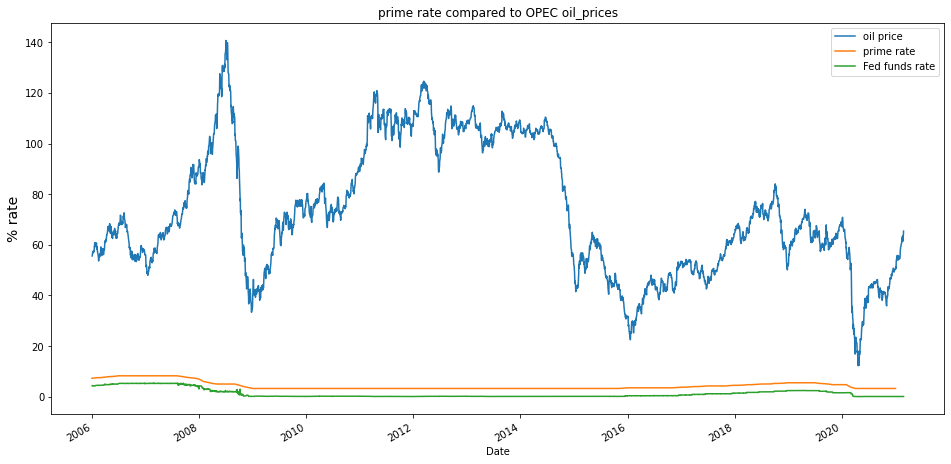

In [19]:
# plot based on opening prices
fig,ax = plt.subplots()
filtered_oil_prices_df['Value'].plot( label = 'oil price', figsize = (16,8))
filtered_prime_rate_df['MPRIME'].plot (label = 'prime rate')
fed_funds_rate_filter['Value'].plot (label = 'Fed funds rate')

#fed_funds_rate['Value'].plot(label = 'federal funds rate', title='Federal funds rate vrs prime rate')
ax.set_ylabel("% rate",fontsize=14)
ax.set_title("prime rate compared to OPEC oil_prices")
plt.legend();

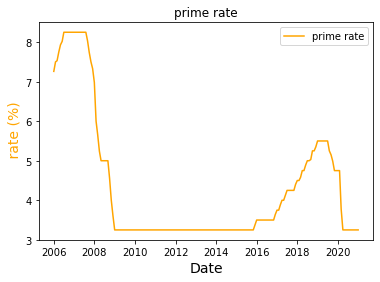

In [35]:
# create figure and axis objects with subplots() for prime rates
fig,ax = plt.subplots()
# make a plot
ax.plot(filtered_prime_rate_df.MPRIME, color="orange")
#ax.plot(fed_funds_rate_filter.Value,color = "green")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel(" rate (%)",fontsize=14,color="orange")
ax.set_title("prime rate")
ax.legend(['prime rate'])


In [36]:
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object  by add oil_data to same plot
ax2.plot(filtered_oil_prices_df.Value,color="blue")
ax2.set_ylabel("oil price ($)",color="blue",fontsize=14)
ax.set_title("prime rate compared to OPEC oil_prices")
ax.legend()
plt.show()
# save the plot as a file
fig.savefig('prime_rate_compared_to_OPEC_oil_prices.jpg',
            format='jpeg',
            dpi=150,
            bbox_inches='tight')


No handles with labels found to put in legend.


# United States Misery index
DESCRIPTION How miserable do you feel? The misery index was initiated by economist Arthur Okun, an adviser to President Lyndon Johnson in the 1960's. It is simply the unemployment rate added to the inflation rate. It is assumed that both a higher rate of unemployment and a worsening of inflation both create economic and social costs for a country. A combination of rising inflation and more people out of work implies a deterioration in economic performance and a rise in the misery index.

In [22]:
Misery_index = quandl.get("USMISERY/INDEX", authtoken = api_key)
Misery_index.tail()


,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2020-09-30,7.9,1.37,9.27
2020-10-31,6.9,1.18,8.08
2020-11-30,6.7,1.17,7.87
2020-12-31,6.7,1.36,8.06
2021-01-31,6.3,1.40,7.70


In [23]:
Misery_index_df=Misery_index.reset_index()
Misery_index_df.tail()

,Date,Unemployment Rate,Inflation Rate,Misery Index
868,2020-09-30,7.9,1.37,9.27
869,2020-10-31,6.9,1.18,8.08
870,2020-11-30,6.7,1.17,7.87
871,2020-12-31,6.7,1.36,8.06
872,2021-01-31,6.3,1.40,7.70


In [24]:
# Filter data for 15 years
Misery_index_filtered = Misery_index_df.loc[(Misery_index_df['Date'] >= '2006-01-01') ]
                    
Misery_index_filtered.tail()

,Date,Unemployment Rate,Inflation Rate,Misery Index
868,2020-09-30,7.9,1.37,9.27
869,2020-10-31,6.9,1.18,8.08
870,2020-11-30,6.7,1.17,7.87
871,2020-12-31,6.7,1.36,8.06
872,2021-01-31,6.3,1.40,7.70


In [25]:
Misery_index_filtered_df =Misery_index_filtered.set_index('Date')
Misery_index_filtered_df.tail(5)

,Unemployment Rate,Inflation Rate,Misery Index
Date,,,
2020-09-30,7.9,1.37,9.27
2020-10-31,6.9,1.18,8.08
2020-11-30,6.7,1.17,7.87
2020-12-31,6.7,1.36,8.06
2021-01-31,6.3,1.40,7.70


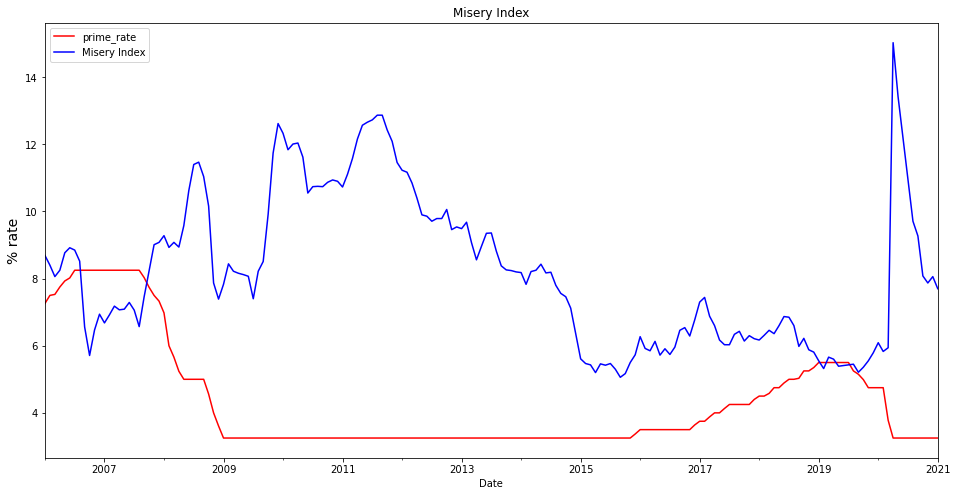

In [26]:
# plot based on opening prices
fig,ax = plt.subplots()
filtered_prime_rate_df['MPRIME'].plot( label = 'prime_rate', figsize = (16,8),color="red")
Misery_index_filtered_df['Misery Index'].plot (label = 'Misery Index',color="blue")
#Misery_index_filtered_df['Inflation Rate'].plot (label = 'inflation')
#Misery_index_filtered_df['Unemployment Rate'].plot (label = 'unemployment')

#fed_funds_rate['Value'].plot(label = 'federal funds rate', title='Federal funds rate vrs prime rate')
ax.set_ylabel("% rate",fontsize=14)
ax.set_title("Misery Index")
plt.legend();

In [27]:
from config import remote_db_endpoint, remote_db_port
from config import remote_db_name, remote_db_user, remote_db_pwd
import mysql.connector

In [28]:
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [29]:
filtered_prime_rate_df.to_sql(name='us_prime_rate', con=engine, if_exists = 'replace', index=True)

Misery_index_filtered_df.to_sql(name='misery_index', con=engine, if_exists = 'replace', index=True)

filtered_oil_prices_df.to_sql(name='oil_prices', con=engine, if_exists = 'replace', index=True)